In [2]:
import random

import math
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact

# Дискретний розподіл

In [5]:
print('Розмір вибірки:')
size = widgets.IntText(value=50)
size

Розмір вибірки:


IntText(value=50)

In [6]:
a = widgets.IntText(value=0)
b = widgets.IntText(value=15)
ui = widgets.HBox([a, b])
def f(a, b):
    print((a, b))

print('Межі вибірки')
out = widgets.interactive_output(f, {'a': a, 'b': b})

display(ui, out)

sampleSize = size.value

Межі вибірки


Output()

In [7]:
sample = [random.randint(a.value, b.value) for i in range(sampleSize)]
print('Вибірка: ', sample, '\n')
sample = sorted(sample)
print('Варіаційний ряд: ', sample)

Вибірка:  [0, 3, 4, 6, 5, 4, 2, 1, 3, 6, 3, 0, 5, 1, 3, 1, 2, 6, 0, 4, 1, 0, 1, 2, 3, 6, 4, 1, 1, 2, 8, 4, 0, 5, 7, 1, 5, 7, 6, 5, 2, 4, 8, 2, 2, 0, 2, 5, 2, 6, 3, 2, 8, 4, 5, 4, 3, 4, 6, 5] 

Варіаційний ряд:  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8]


In [8]:
numCount = {}
uniqueVariation = sorted(list(set(sample)))
for num in uniqueVariation:
    numCount[num] = sample.count(num)
numCount

{0: 6, 1: 8, 2: 10, 3: 7, 4: 9, 5: 8, 6: 7, 7: 2, 8: 3}

# Frequencies

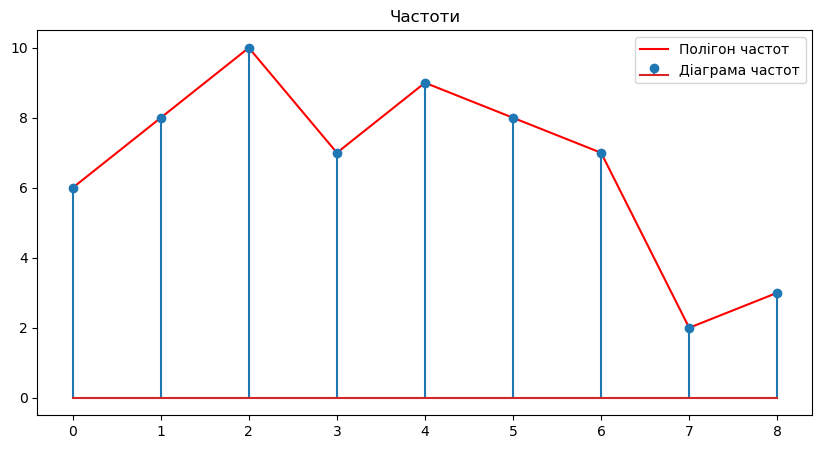

In [9]:
plt.figure(figsize=(10,5))
plt.title('Частоти')
plt.plot(numCount.keys(),
        numCount.values(),
        color='red',
        label='Полігон частот')
plt.stem(numCount.keys(),
        numCount.values(),
        label='Діаграма частот')

plt.legend()
plt.show()

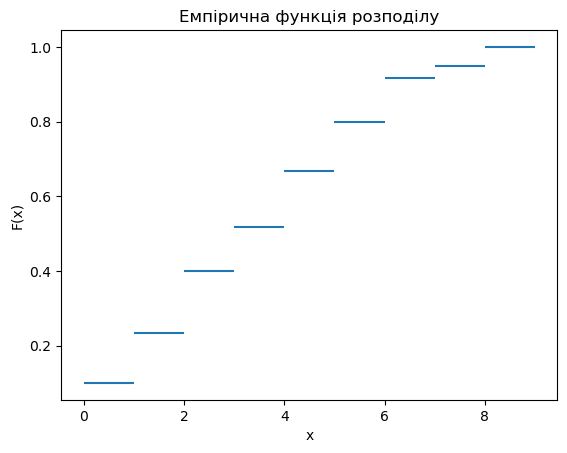

In [10]:
x = list(numCount.keys())
x.append(x[-1] + 1)
y = list(numCount.values())

ecdf = np.cumsum(y) / np.sum(y)

plt.hlines(ecdf, x[:-1], x[1:])
plt.xlabel('x')
plt.ylabel('F(х)')
plt.title('Емпірична функція розподілу')
plt.show()

In [11]:
mean = sum(sample) / len(sample)
print('Середньовибіркове:', mean)

n = len(sample)
if n % 2 == 0:
    median = (sample[n//2 - 1] + sample[n//2]) / 2
else:
    median = sample[n//2]
print('Медіана:', median)

frequency = {}
for num in sample:
    frequency[num] = frequency.get(num, 0) + 1
mode = max(frequency, key=frequency.get)
print('Мода:', mode)

print('\n')
dataScope = max(sample) - min(sample)
print('Розмах:', dataScope)

deviation = sum((x - mean) ** 2 for x in sample) / n
print('Девіація:', deviation)

variance = deviation / (n - 1)
print('Варіанса:', variance)

fluctuation = variance ** 0.5
print('Стандарт:', fluctuation)

variation = fluctuation / mean
print('Варіація:', variation)

dispersion = deviation / n
print('Дисперсія:', dispersion)

sigma = dispersion ** 0.5
print('Середньоквадратичне відхилення:', sigma)

moment_2 = sum((x - mean) ** 2 for x in sample) / n
moment_3 = sum((x - mean) ** 3 for x in sample) / n
moment_4 = sum((x - mean) ** 4 for x in sample) / n

print('\n')
skewness = moment_3 / (moment_2 ** 1.5)
print('Асиметрія:', skewness)

kurtosis = moment_4 / (moment_2 ** 2) - 3
print('Ексцес: ', kurtosis)

Середньовибіркове: 3.4166666666666665
Медіана: 3.0
Мода: 2


Розмах: 8
Девіація: 4.943055555555557
Варіанса: 0.08378060263653488
Стандарт: 0.2894487910434847
Варіація: 0.0847167193298004
Дисперсія: 0.08238425925925928
Середньоквадратичне відхилення: 0.2870265828442712


Асиметрія: 0.23344272764445329
Ексцес:  -0.8529060281225713


In [12]:
quantiles = {4: [], 8: [], 10: [], 100: []}

for q in quantiles.keys():
    if n % q == 0: quantiles[q] = [sample[int(n / q*(i+1))] for i in range(q - 1)]

for key, value in quantiles.items():
    if value: print(f'{key}\'тилі: {value}')

4'тилі: [2, 3, 5]
10'тилі: [1, 1, 2, 3, 3, 4, 5, 6, 6]


# Неперервний розподіл

In [13]:
print('Розмір вибірки:')
size = widgets.IntText(value=50)
size

Розмір вибірки:


IntText(value=50)

In [14]:
a = widgets.IntText(value=0)
b = widgets.IntText(value=15)
ui = widgets.HBox([a, b])
def f(a, b):
    print((a, b))

print('Межі вибірки')
out = widgets.interactive_output(f, {'a': a, 'b': b})

display(ui, out)

sampleSize = size.value

Межі вибірки


Output()

In [15]:
sample = [round(random.uniform(a.value, b.value), 2) for i in range(sampleSize)]
print('Вибірка: ', sample, '\n')
sample = sorted(sample)
print('Варіаційний ряд: ', sample)

Вибірка:  [4.52, 2.39, 1.45, 7.73, 4.34, 3.79, 3.35, 4.78, 3.29, 3.48, 6.57, 5.21, 1.76, 2.44, 4.58, 4.52, 3.4, 0.38, 5.18, 3.67, 1.46, 6.0, 1.41, 0.82, 5.36, 0.69, 1.91, 6.46, 6.82, 7.14, 6.28, 5.31, 5.35, 1.51, 7.92, 4.86, 6.6, 2.41, 2.87, 7.26, 4.65, 3.95, 3.38, 2.35, 3.37, 3.9, 6.55, 7.17, 3.77, 2.56, 0.74, 3.93, 2.37, 7.7, 6.83, 4.11, 7.68, 5.45, 0.64, 2.8] 

Варіаційний ряд:  [0.38, 0.64, 0.69, 0.74, 0.82, 1.41, 1.45, 1.46, 1.51, 1.76, 1.91, 2.35, 2.37, 2.39, 2.41, 2.44, 2.56, 2.8, 2.87, 3.29, 3.35, 3.37, 3.38, 3.4, 3.48, 3.67, 3.77, 3.79, 3.9, 3.93, 3.95, 4.11, 4.34, 4.52, 4.52, 4.58, 4.65, 4.78, 4.86, 5.18, 5.21, 5.31, 5.35, 5.36, 5.45, 6.0, 6.28, 6.46, 6.55, 6.57, 6.6, 6.82, 6.83, 7.14, 7.17, 7.26, 7.68, 7.7, 7.73, 7.92]


In [16]:
r = math.ceil(math.log2(sampleSize)) - 1

hist, bin_edges = np.histogram(sample, bins=r+1)
hist = list(hist)
bin_edges = list(bin_edges)
sampleSize = 60
numCount = dict(zip(bin_edges[1:], hist))
print("Інтервали:", bin_edges)
print("Частоти:", hist)

Інтервали: [0.38, 1.6366666666666667, 2.893333333333333, 4.1499999999999995, 5.406666666666666, 6.663333333333333, 7.92]
Частоти: [9, 10, 13, 12, 7, 9]


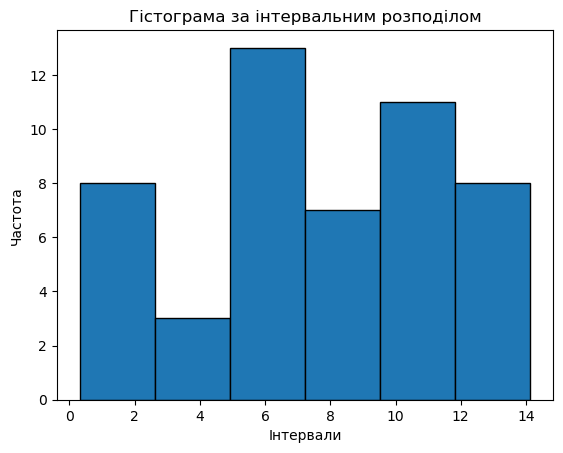

In [222]:
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', align='edge')
plt.title('Гістограма за інтервальним розподілом')
plt.xlabel('Інтервали')
plt.ylabel('Частота')
plt.show()

[1.4625000000000001, 3.7675, 6.0725, 8.377500000000001, 10.682500000000001, 12.9875, 13.9875]
[0.16 0.22 0.48 0.62 0.84 1.  ]


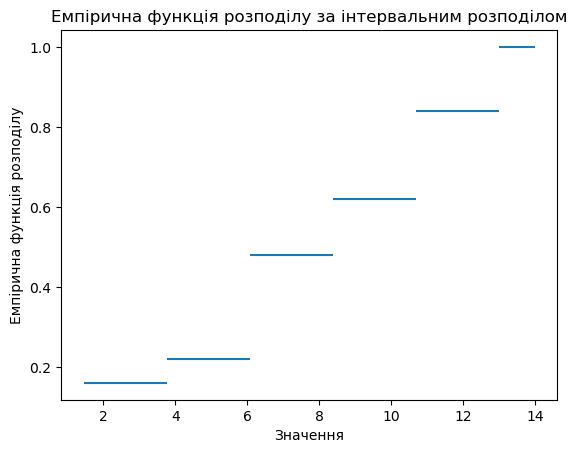

In [223]:
cumulative_hist = np.cumsum(hist) / np.sum(hist)
x = []
for i in range(0, len(bin_edges) - 1):
    x.append((bin_edges[i + 1] + bin_edges[i]) / 2)
x.append(x[-1] + 1)
print(x)
print(cumulative_hist)
plt.hlines(cumulative_hist, x[:-1], x[1:])
plt.title('Емпірична функція розподілу за інтервальним розподілом')
plt.xlabel('Значення')
plt.ylabel('Емпірична функція розподілу')
plt.show()

In [17]:
n = sampleSize
print('\n')
midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]
midDict = dict(zip(numCount.values(), midpoints))

mean = 0
for value, mid in midDict.items():
    mean += mid * value
mean /= n
print('Середньовибіркове: ', mean)

modal_index = hist.index(max(hist))
L = bin_edges[modal_index]
h = bin_edges[1] - bin_edges[0]
f1 = hist[modal_index]
if modal_index > 0:
    f0 = hist[modal_index - 1]
else:
    f0 = 0
if modal_index < len(hist) - 1:
    f2 = hist[modal_index + 1]
else:
    f2 = 0
mode = L + ((f1 - f0) / (2 * f1 - f0 - f2)) * h
print('Мода: ', mode)

total_freq = sum(hist)
cumulative_freq = [sum(hist[:i+1]) for i in range(len(hist))]
median_class_index = next(i for i, freq in enumerate(cumulative_freq) if freq >= total_freq / 2)
lower_boundary = bin_edges[median_class_index]
upper_boundary = bin_edges[median_class_index + 1]
class_width = bin_edges[1] - bin_edges[0]
median = lower_boundary + ((total_freq / 2 - cumulative_freq[median_class_index - 1]) / hist[median_class_index]) * class_width
print('Медіана: ', median)

print('\n')
dataScope = bin_edges[-1] - bin_edges[0]
print('Розмах: ', dataScope)

deviation = sum(freq * (mid - mean) ** 2 for freq, mid in midDict.items())
print('Девіація: ', deviation)

variance = deviation / (sampleSize-1)
print('Варіанса: ',variance)

fluctuation = variance ** 0.5
print('Стандарт: ', fluctuation)

variation = fluctuation / mean
print('Варіація:', variation)

dispersion = deviation / n
print('Дисперсія: ', dispersion)

sigma = dispersion ** 0.5
print('Середньоквадратичне відхилення: ', sigma)

central_moment_3 = sum(((mid - mean) ** 3) * freq for freq, mid in midDict.items()) / n
central_moment_4 = sum(((mid - mean) ** 4) * freq for freq, mid in midDict.items()) / n

skewness = central_moment_3 / (sigma ** 3)
kurtosis = central_moment_4 / (sigma ** 4) - 3
print('\n')
print('Асиметрія:', skewness)
print('Ексцес:', kurtosis)



Середньовибіркове:  3.8940277777777776
Мода:  3.8358333333333334
Медіана:  3.9566666666666666


Розмах:  7.54
Девіація:  173.70564172453703
Варіанса:  2.9441634190599495
Стандарт:  1.7158564680823247
Варіація: 0.44063796305570274
Дисперсія:  2.895094028742284
Середньоквадратичне відхилення:  1.7014975841129731


Асиметрія: 1.3063098878780652
Ексцес: -0.16749108671227564
